#**Instalación del Paquete**

In [ ]:
!pip install -Uq lightkurve --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 50.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 33.4 MB/s eta 0:00:00


#**Importar el Paquete**

In [ ]:
import lightkurve as lk

#**Escoger Datos de Observación**

In [ ]:
lk.search_lightcurve('TRAPPIST-1')

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 12,2016,K2,60,ktwo246199087,0.0
1,K2 Campaign 12,2016,K2,1800,ktwo246199087,0.0
2,K2 Campaign 19,2018,K2,60,ktwo246199087,0.0
3,K2 Campaign 19,2018,K2,1800,ktwo246199087,0.0
4,K2 Campaign 12,2016,EVEREST,1800,ktwo246199087,0.0
5,K2 Campaign 12,2016,K2SFF,1800,ktwo246199087,0.0
6,K2 Campaign 19,2018,K2SFF,1800,ktwo246199087,0.0
7,TESS Sector 70,2023,SPOC,20,278892590,0.0
8,TESS Sector 70,2023,SPOC,120,278892590,0.0


In [ ]:
lc = lk.search_lightcurve('TRAPPIST-1')[4].download().remove_outliers().flatten()

#**Graficar Datos de Observación**

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

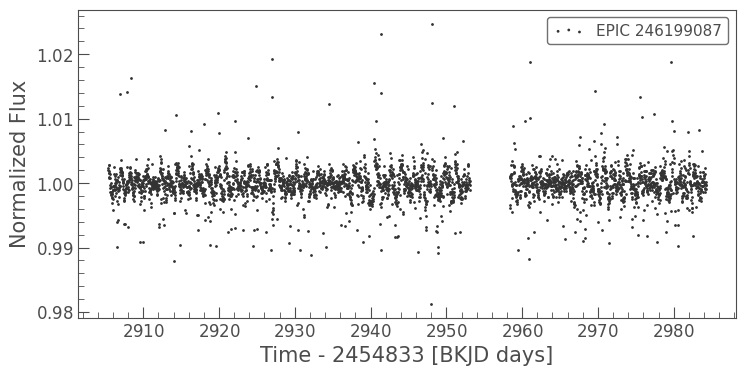

In [ ]:
lc.scatter()

#**Graficar Periodograma**

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

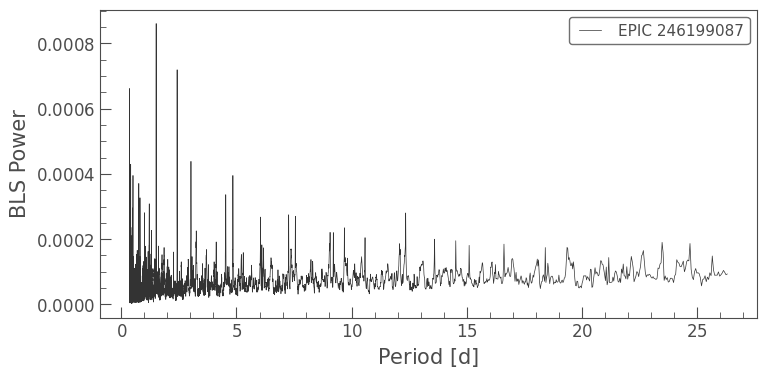

In [ ]:
bls = lc.to_periodogram('bls')

bls.plot()

#**Modelo de Transito**

In [ ]:
time = bls.transit_time_at_max_power

period = bls.period_at_max_power

duration = bls.duration_at_max_power

model = bls.get_transit_model(period, duration, time)

#**Graficar Transito**

<Axes: xlabel='Phase [JD]', ylabel='Flux'>

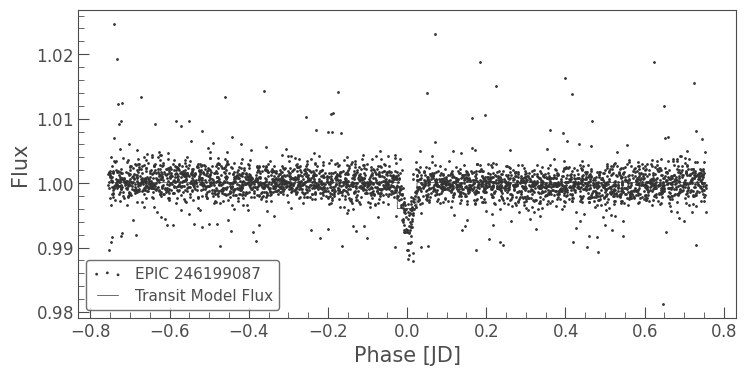

In [ ]:
model.fold(period, time).plot(ax = lc.fold(period, time).scatter())